## Automatidata project
#### Course 4 - Regression Analysis

Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. 

In [40]:
import pandas as pd 
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from datetime import date, datetime,timedelta

In [41]:
taxi_raw = pd.read_csv('../raw_data/2017_Yellow_Taxi_Trip_Data.csv')
taxi_raw.head(15)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.00,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.00,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.00,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.00,0.3,16.55


In [42]:
taxi_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [43]:
taxi_raw.shape

(22699, 18)

In [44]:
taxi_raw.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [45]:
taxi_raw.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [46]:
taxi_raw = taxi_raw.rename(columns={'Unnamed: 0':'Trip_ID'})

# Change the dtype of date columns as tpep_pickup_datetime and tpep_dropoff_datetime

taxi_raw['tpep_pickup_datetime'] = pd.to_datetime(taxi_raw['tpep_pickup_datetime'], format ='%m/%d/%Y %I:%M:%S %p')
taxi_raw['tpep_dropoff_datetime'] = pd.to_datetime(taxi_raw['tpep_dropoff_datetime'], format ='%m/%d/%Y %I:%M:%S %p')


taxi_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [47]:
taxi_raw.head()

,Trip_ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [48]:
# Create the column of the trip duration

taxi_raw['Trip Duration'] = taxi_raw['tpep_dropoff_datetime'] - taxi_raw['tpep_pickup_datetime']
taxi_raw['Trip Duration'] = taxi_raw['Trip Duration']/np.timedelta64(1,'s')
taxi_raw.head()

,Trip_ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Trip Duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,844.0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,1590.0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,432.0
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,1815.0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,1003.0


In [49]:
taxi_subset = taxi_raw[['Trip Duration','total_amount','trip_distance','fare_amount','tip_amount']]

<Axes: ylabel='tip_amount'>

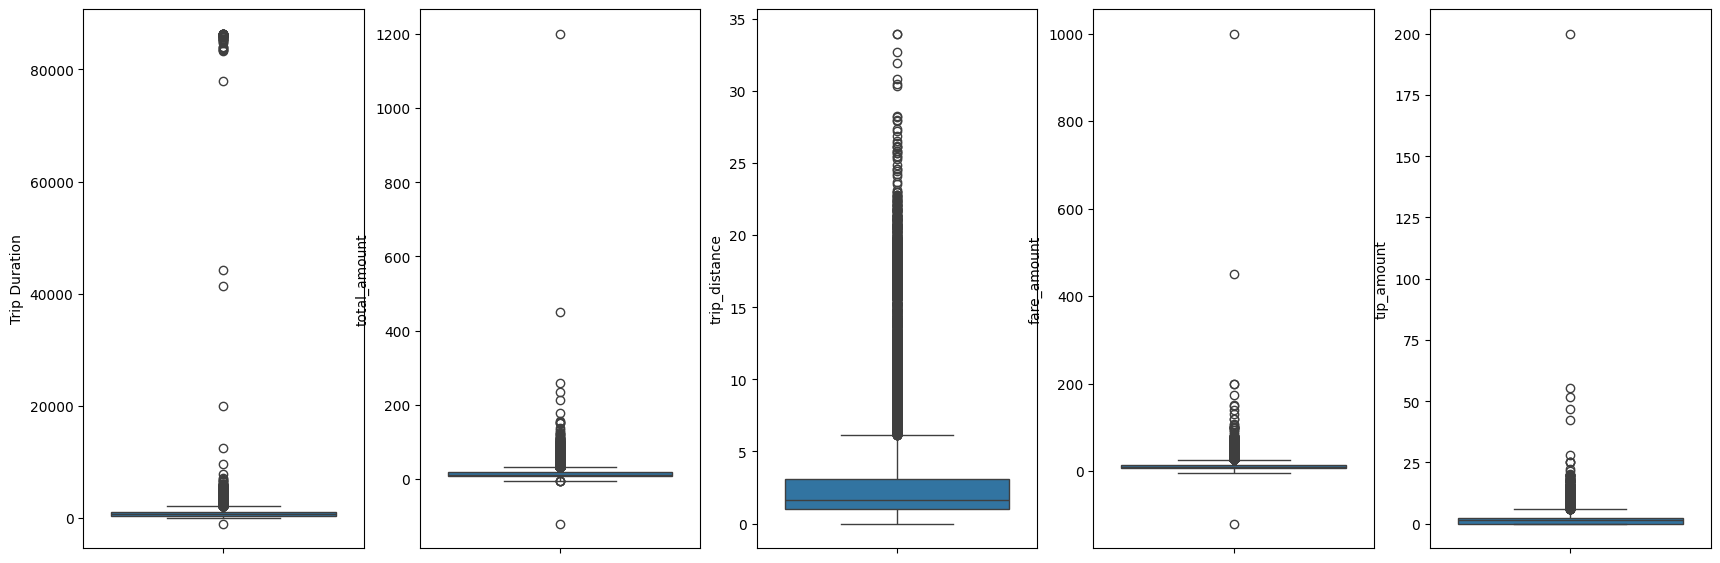

In [50]:
fig, axes = plt.subplots(1,5,figsize=(21,7))

sns.boxplot(
    data = taxi_subset['Trip Duration'],
    ax= axes[0]
)

sns.boxplot(
    data= taxi_subset['total_amount'],
    ax = axes[1]
)

sns.boxplot(
    data= taxi_subset['trip_distance'],
    ax = axes[2]
)

sns.boxplot(
    data= taxi_subset['fare_amount'],
    ax = axes[3]
)

sns.boxplot(
    data= taxi_subset['tip_amount'],
    ax = axes[4]
)

<Axes: ylabel='tip_amount'>

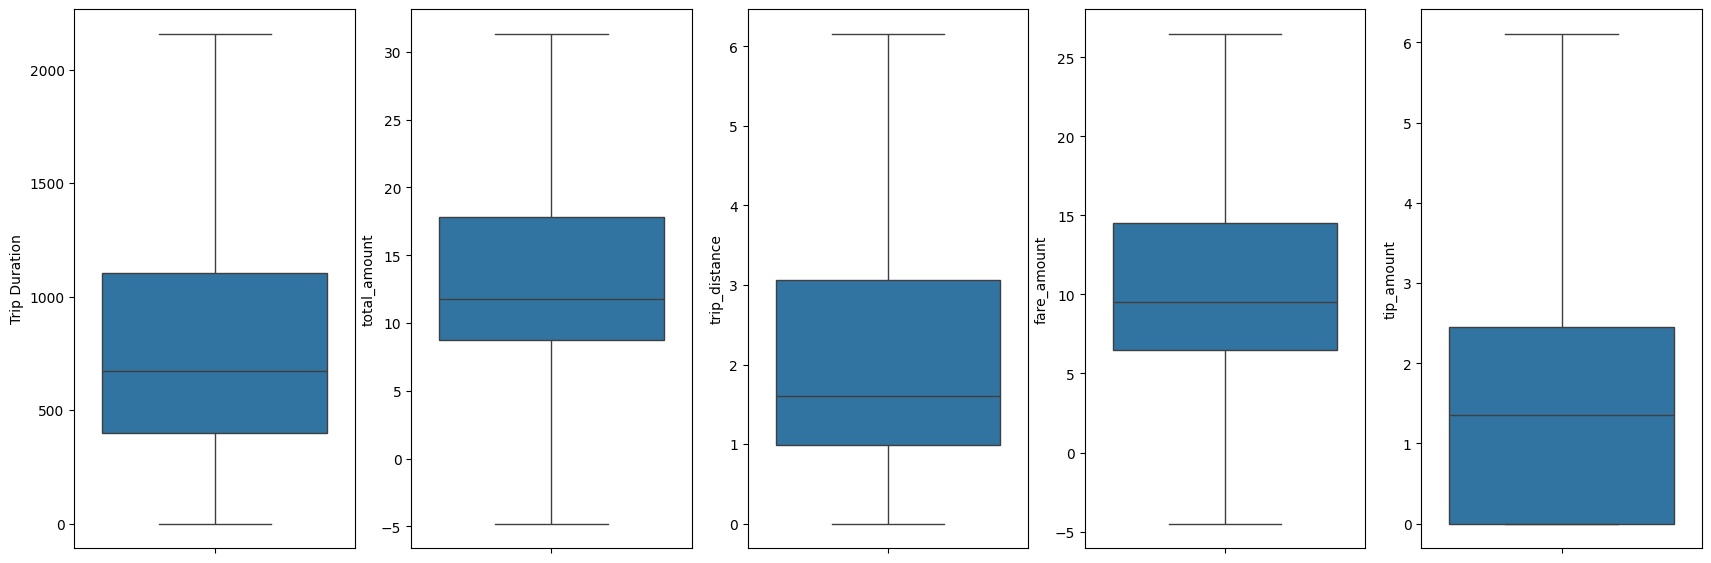

In [51]:
fig, axes = plt.subplots(1,5,figsize=(21,7))

sns.boxplot(
    data = taxi_subset['Trip Duration'],
    ax= axes[0],
    showfliers = False
)

sns.boxplot(
    data= taxi_subset['total_amount'],
    ax = axes[1],
    showfliers = False
)

sns.boxplot(
    data= taxi_subset['trip_distance'],
    ax = axes[2],
    showfliers = False
)

sns.boxplot(
    data= taxi_subset['fare_amount'],
    ax = axes[3],
    showfliers = False
)

sns.boxplot(
    data= taxi_subset['tip_amount'],
    ax = axes[4],
    showfliers = False
)

<Axes: >

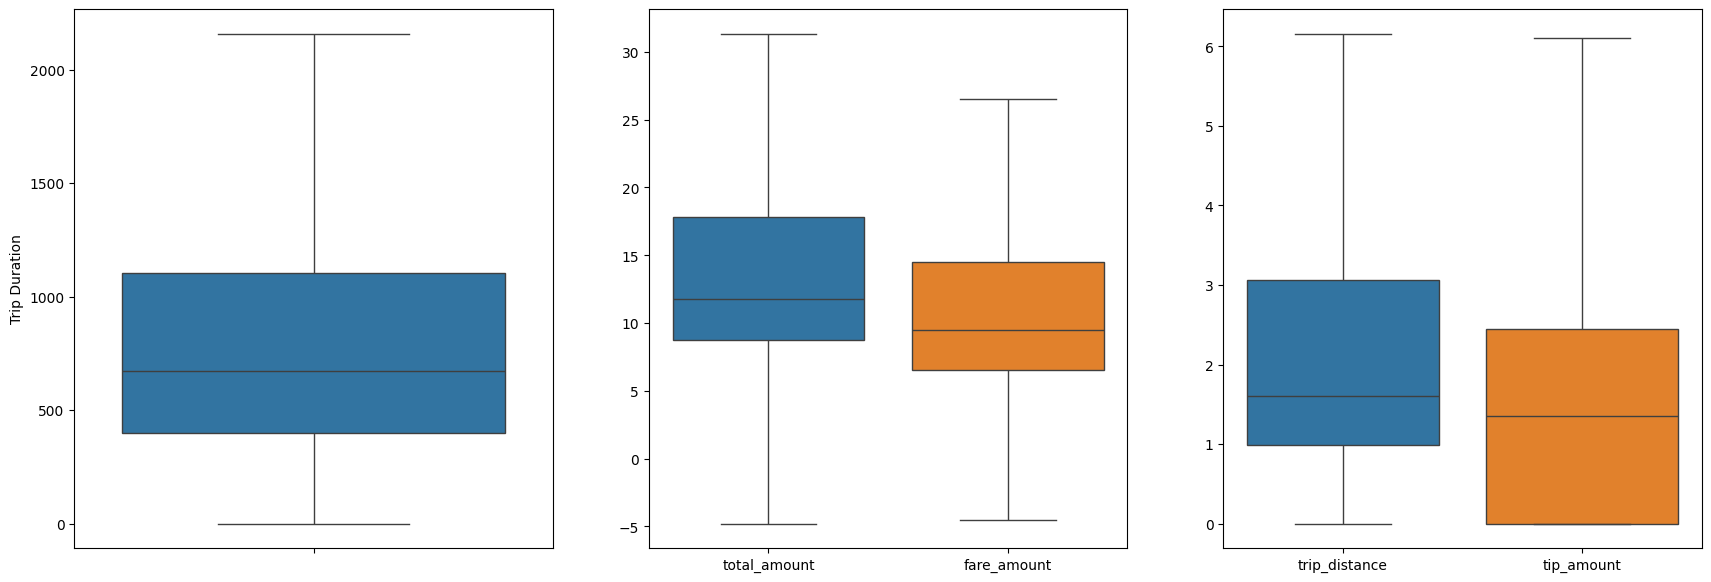

In [52]:
fig, axes = plt.subplots(1,3,figsize=(21,7))

sns.boxplot(
    data = taxi_subset['Trip Duration'],
    ax= axes[0],
    showfliers = False
)

sns.boxplot(
    data= taxi_subset[['total_amount','fare_amount']],
    ax = axes[1],
    showfliers = False
)

sns.boxplot(
    data= taxi_subset[['trip_distance','tip_amount']],
    ax = axes[2],
    showfliers = False
)


In [53]:
trip_distance_sorted = taxi_subset['trip_distance'].sort_values()
trip_distance_sorted.head(15)

22670    0.0
647      0.0
6575     0.0
18380    0.0
13075    0.0
13062    0.0
10108    0.0
13561    0.0
15295    0.0
15084    0.0
20080    0.0
13359    0.0
10579    0.0
8353     0.0
12238    0.0
Name: trip_distance, dtype: float64

In [54]:
trip_distance_sorted.shape

(22699,)

In [55]:
trip_distance_set = set(trip_distance_sorted)

print(f'The amount of unique values in trip distance: {len(trip_distance_set)}')

list(trip_distance_set)[:15]

The amount of unique values in trip distance: 1545


[0.0,
 0.25,
 0.5,
 0.75,
 1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.25,
 2.5,
 2.75,
 4.0,
 5.0,
 6.0]

In [56]:
zero_distance = trip_distance_sorted[trip_distance_sorted == 0]
zero_distance.shape

(148,)

In [57]:
print(f'There are {zero_distance.shape[0]} trips where the distance was 0 miles, which represent {(zero_distance.shape[0]/trip_distance_sorted.shape[0])*100:.2f}% of the dataset.')

There are 148 trips where the distance was 0 miles, which represent 0.65% of the dataset.


In [58]:
## Check the info from the fare amount set

taxi_subset['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [59]:
# Why I do have fare amounts negatives?

less_than_zero_fare = taxi_subset[taxi_subset['fare_amount'] <= 0]
less_than_zero_fare

,Trip Duration,total_amount,trip_distance,fare_amount,tip_amount
314,29.0,-3.8,0.12,-2.5,0.0
1646,37.0,-3.3,0.04,-2.5,0.0
4402,2457.0,0.0,7.06,0.0,0.0
4423,80.0,-4.3,0.06,-3.0,0.0
5448,133.0,-4.3,0.25,-3.5,0.0
5722,2.0,0.0,0.00,0.0,0.0
5758,16.0,-3.8,0.02,-2.5,0.0
8204,143.0,-4.8,0.41,-3.5,0.0
10281,124.0,-4.3,0.00,-2.5,0.0
10506,2.0,0.0,0.00,0.0,0.0


In [60]:
# Replace in the dataset the values under 0 to 0

taxi_subset.loc[taxi_subset['fare_amount']<0,'fare_amount'] = 0

In [61]:
taxi_subset['fare_amount'].describe()

count    22699.000000
mean        13.033832
std         13.212462
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [62]:
def ouliers_handling(dataframe,column_list,iqr_factor=1.5):
    '''
    Function to handle upper-threshold to remove
    outliers of the columns in the dataset. 

    Arguments: 
        dataframe: dataset 
        column_list: List of columns in the dataset to iterate over
        iqr_factor: Use to set the upper_threshold. 
    '''
    #Check that the columns exists in the dataset
    columns_check = any(column in column_list for column in dataframe.columns)
    if columns_check == False: return 'Check list of columns. One or more columns not found'

    #Iterate column by column
    for column in column_list:

        #Replace values lower than 0 to 0
        dataframe.loc[dataframe[column] < 0,column] = 0

        #Now calculate q1, q3 and upper limit
        q1 = dataframe[column].quantile(0.25)
        q3 = dataframe[column].quantile(0.75)
        iqr = q3 - q1

        upper_limit = q3 + (iqr_factor*iqr)

        #Print q3, iqr, upper_limit
        print(column)
        print(f'q3 value: {q3}')
        print(f'Inter Quarter Range value: {iqr}')
        print(f'Upper Limit set to: {upper_limit}')

        #Replace values higher than the upper limit, to the upper Limit
        dataframe.loc[ dataframe[column] > upper_limit, column] = upper_limit

        print(dataframe[column].describe())
        print('=-='*10)

    return dataframe


In [63]:
ouliers_handling(taxi_subset,['Trip Duration','total_amount'],6)

Trip Duration
q3 value: 1103.0
Inter Quarter Range value: 704.0
Upper Limit set to: 5327.0
count    22699.000000
mean       867.633288
std        716.822559
min          0.000000
25%        399.000000
50%        671.000000
75%       1103.000000
max       5327.000000
Name: Trip Duration, dtype: float64
=-==-==-==-==-==-==-==-==-==-=
total_amount
q3 value: 17.8
Inter Quarter Range value: 9.05
Upper Limit set to: 72.10000000000001
count    22699.000000
mean        16.124719
std         12.905021
min          0.000000
25%          8.750000
50%         11.800000
75%         17.800000
max         72.100000
Name: total_amount, dtype: float64
=-==-==-==-==-==-==-==-==-==-=


,Trip Duration,total_amount,trip_distance,fare_amount,tip_amount
0,844.0,16.56,3.34,13.0,2.76
1,1590.0,20.80,1.80,16.0,4.00
2,432.0,8.75,1.00,6.5,1.45
3,1815.0,27.69,3.70,20.5,6.39
4,1003.0,17.80,4.37,16.5,0.00
...,...,...,...,...,...
22694,196.0,5.80,0.61,4.0,0.00
22695,2448.0,72.10,16.71,52.0,14.64
22696,248.0,5.30,0.42,4.5,0.00
22697,716.0,13.00,2.36,10.5,1.70


## 3a. Feature engineering

The model would not know the duration of the trip or the distance until the trip is completed. What I will need to do, is based on known information create an estimate of trip duration and trip distance based on starting point and destination point, so trips that hisotrically starts at the same point and ends in the same point should have a relatively low variance on distance and duration. 

In [64]:
taxi_raw['origin_destine'] = taxi_raw['PULocationID'].astype(str) + '-' + taxi_raw['DOLocationID'].astype(str)
taxi_raw['origin_destine'].head()

0    100-231
1     186-43
2    262-236
3     188-97
4      4-112
Name: origin_destine, dtype: object

In [65]:
# Create a new table where unique origin and destine trips will store Trip Distance and Trip Duration

mean_distance = taxi_raw.groupby('origin_destine').agg({'trip_distance':'mean','Trip Duration':'mean'}).round(4).reset_index()
mean_distance = mean_distance.rename(columns={'trip_distance':'trip_distance_mean','Trip Duration':'Trip_duration_mean'})
mean_distance

,origin_destine,trip_distance_mean,Trip_duration_mean
0,1-1,2.4333,28.0000
1,10-148,15.7000,4162.0000
2,100-1,16.8900,2891.0000
3,100-100,0.2533,187.8333
4,100-107,1.1800,672.0000
...,...,...,...
4167,97-65,0.5000,269.0000
4168,97-66,1.4000,674.0000
4169,97-80,3.8400,1430.0000
4170,97-90,4.4200,706.0000


In [67]:
taxi_raw = taxi_raw.merge(mean_distance,on=['origin_destine'],how='left')
taxi_raw


,Trip_ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Trip Duration,origin_destine,trip_distance_mean,Trip_duration_mean
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.5,2.76,0.00,0.3,16.56,844.0,100-231,3.5217,1370.8333
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.5,4.00,0.00,0.3,20.80,1590.0,186-43,3.1089,1468.2222
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.5,1.45,0.00,0.3,8.75,432.0,262-236,0.8814,435.0000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.5,6.39,0.00,0.3,27.69,1815.0,188-97,3.7000,1815.0000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.5,0.00,0.00,0.3,17.80,1003.0,4-112,4.4350,877.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,...,1.0,0.5,0.00,0.00,0.3,5.80,196.0,48-186,1.0982,515.6786
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,...,0.0,0.5,14.64,5.76,0.3,73.20,2448.0,132-164,18.7575,3573.6250
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,...,0.0,0.5,0.00,0.00,0.3,5.30,248.0,107-234,0.6842,396.5455
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,...,0.0,0.5,1.70,0.00,0.3,13.00,716.0,68-144,2.0775,999.0000


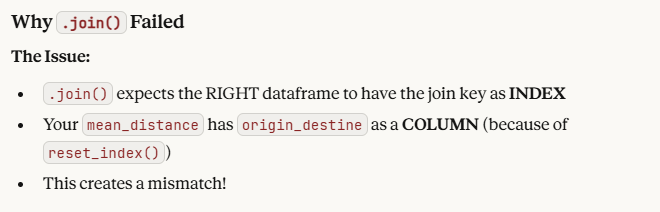

In [ ]:
# Now I will create a column called rush_hour
# The rush hour will be 
#   Any Week Day between 06-10 am or 04-08 pm

taxi_raw['trip_pickup_day'] = taxi_raw['tpep_pickup_datetime'].dt.dayofweek
taxi_raw['trip_pickup_hour'] = taxi_raw['tpep_pickup_datetime'].dt.hour

# Days 5 and 6 Correspond to Saturday and Sunday

def rush_hour(row):
    '''
    Docstring for rush_hour
    The rush hour will be 
    Any Week Day between 06-10 am or 04-08 pm
    :param row: dataframe row
    '''
    if (row['trip_pickup_day'] not in [5,6]) & ((6 <= row['trip_pickup_hour'] < 10)|(16 <= row['trip_pickup_hour'] < 20)):
        return 1
    else:
        return 0
    
taxi_raw['rush_hour'] = taxi_raw.apply(rush_hour,axis=1)

taxi_raw.head(25)

,Trip_ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,improvement_surcharge,total_amount,Trip Duration,origin_destine,trip_distance_mean,Trip_duration_mean,day,trip_pickup_day,trip_pickup_hour,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.3,16.56,844.0,100-231,3.5217,1370.8333,5,5,8,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.3,20.80,1590.0,186-43,3.1089,1468.2222,1,1,14,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.3,8.75,432.0,262-236,0.8814,435.0000,4,4,7,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.3,27.69,1815.0,188-97,3.7000,1815.0000,6,6,13,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.3,17.80,1003.0,4-112,4.4350,877.0000,5,5,23,0
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,0.3,12.36,480.0,161-236,2.0523,711.3226,5,5,20,0
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,0.3,59.16,3578.0,79-241,12.8300,3578.0000,2,2,19,1
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,0.3,19.58,1319.0,237-114,4.0225,1586.2500,1,1,17,1
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,0.3,9.80,727.0,234-249,1.0193,472.4074,5,5,16,0
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,0.3,16.55,1226.0,239-237,1.5800,632.4667,4,4,15,0


In [94]:
taxi_raw.loc[taxi_raw['rush_hour'] == 1, ['trip_pickup_day','trip_pickup_hour']][:50]

,trip_pickup_day,trip_pickup_hour
2,4,7
6,2,19
7,1,17
12,4,19
15,4,6
16,1,19
18,0,18
33,3,19
37,3,8
40,4,19


In [96]:
# Now I will need to integrate the taxi_raw table new columns and the taxi_subset datafra

taxi_data = taxi_subset.join(taxi_raw[['trip_distance_mean','Trip_duration_mean','rush_hour']],how='inner')
taxi_data.head(12)

,Trip Duration,total_amount,trip_distance,fare_amount,tip_amount,trip_distance_mean,Trip_duration_mean,rush_hour
0,844.0,16.56,3.34,13.0,2.76,3.5217,1370.8333,0
1,1590.0,20.80,1.80,16.0,4.00,3.1089,1468.2222,0
2,432.0,8.75,1.00,6.5,1.45,0.8814,435.0000,1
3,1815.0,27.69,3.70,20.5,6.39,3.7000,1815.0000,0
4,1003.0,17.80,4.37,16.5,0.00,4.4350,877.0000,0
5,480.0,12.36,2.30,9.0,2.06,2.0523,711.3226,0
6,3578.0,59.16,12.83,47.5,9.86,12.8300,3578.0000,1
7,1319.0,19.58,2.98,16.0,1.78,4.0225,1586.2500,1
8,727.0,9.80,1.20,9.0,0.00,1.0193,472.4074,0
9,1226.0,16.55,1.60,13.0,2.75,1.5800,632.4667,0


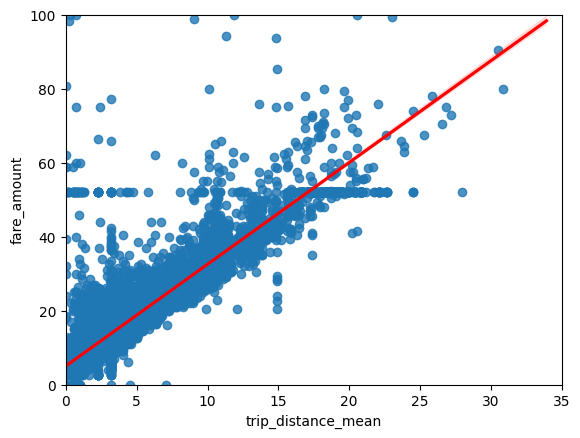

In [110]:
sns.regplot(
    data=taxi_data,
    x = 'trip_distance_mean',
    y = 'fare_amount',
    line_kws={'color':'red'}
)

plt.xlim(0,35)
plt.ylim(0,100)

plt.show()

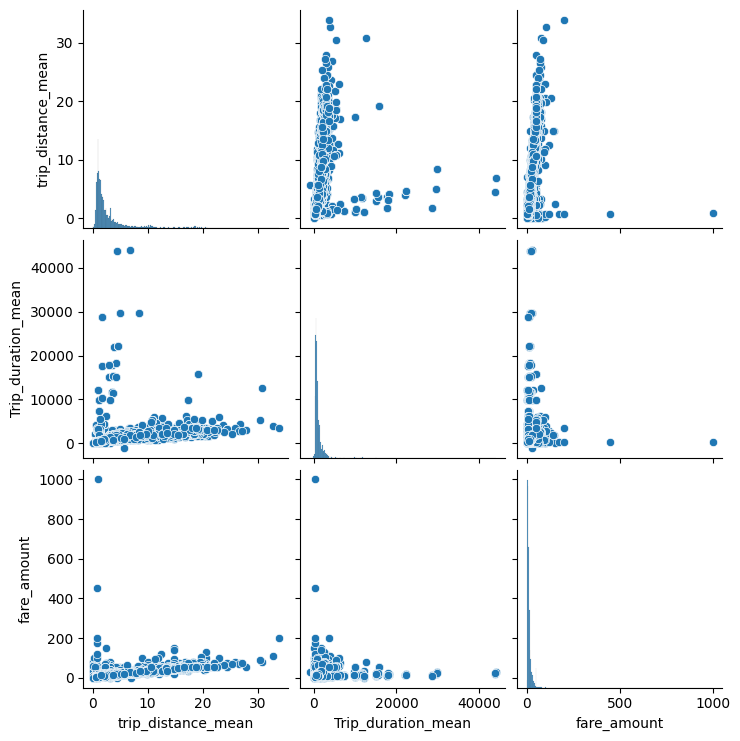

In [113]:
sns.pairplot(
    data= taxi_data[['trip_distance_mean','Trip_duration_mean','fare_amount']]
)

In [114]:
taxi_subset2 = taxi_data[['fare_amount','trip_distance_mean','Trip_duration_mean','rush_hour']]

taxi_subset2.corr(method='pearson')

,fare_amount,trip_distance_mean,Trip_duration_mean,rush_hour
fare_amount,1.000000,0.741845,0.304644,-0.016683
trip_distance_mean,0.741845,1.000000,0.385880,-0.039725
Trip_duration_mean,0.304644,0.385880,1.000000,-0.013395
rush_hour,-0.016683,-0.039725,-0.013395,1.000000


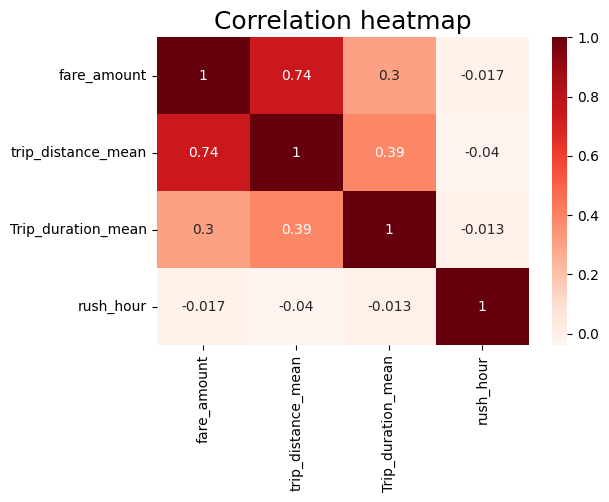

In [115]:
# Create correlation heatmap

plt.figure(figsize=(6,4))
sns.heatmap(taxi_subset2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()